# BT4012 Project Group 7
*Done by: Aum Sebin, Cheang Chi Yan Anthony, Chen Min Ern, Dao Minh Hai, Yasalpu Siva Sai Theja*

## **Medical Provider Fraud**
In this notebook, we will examine medical provider fraud using data provided by Medicare. 

According to the US Government, the total Medicare spending increased exponentially due to frauds in Medicare claims. Healthcare (Provider) fraud is an organized crime which involves peers of providers, physicians, beneficiaries acting together to make fraudulent claims.

The link to the datasets can be found here: https://www.kaggle.com/datasets/rohitrox/healthcare-provider-fraud-detection-analysis

Altogether, we have 4 types of data: Label data, Beneficiary data, Inpatient data and Outpatient data.

## **Table of Contents**
1. [Data Preparation](#chapter1)
    * [Data Importing](#section_1_1)
    * [Data Merging](#section_1_2)
2. [Data Preprocessing](#chapter2)
    * [Data Cleaning](#section_2_1)
    * [Feature Engineering](#section_2_2)
    * [Handling Missing Values](#section_2_3)
    * [Categorical Encoding](#section_2_4)
    * [Frequency Encoding](#section_2_5)
    * [Vector Embedding of Diagnosis Codes](#section_2_6)
3. [Exploratory Data Analysis](#chapter3)
    * [Correlation Plot](#section_3_1)
    * [Overall Fraud Proportion](#section_3_2)
    * [Proportion by Categorical Features](#section_3_3)
    * [Distribution of Numerical Features](#section_3_4)
4. [Data Uploading](#chapter4)
    * [Obtain Relevant Columns](#section_4_1)

In [1]:
# Please uncomment and run these lines if you don't have the required libraries installed
# # For General preprocessing
# !pip install category_encoders, matplotlib, numpy, pandas, seaborn, scikit-learn, seaborn
# # For automated feature engineering and model-building
# !pip install featuretools, woodwork

# Import all libraries

# For data processing and plots
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# For categorical encoding
import category_encoders as ce

# For data scaling
from sklearn.preprocessing import MinMaxScaler

# Ignore deprecation warnings
import warnings

warnings.filterwarnings("ignore")

# Allow viewing of all columns
pd.set_option("display.max_columns", 500)

## 1. Data Preparation <a class="anchor" id="chapter1"></a>

The first step is to import and prepare our data.

### 1.1 Data Importing <a class="anchor" id="section_1_1"></a>
We start by importing and taking a look at our raw data sets.

In [2]:
# Import train and test data
beneficiary_test = pd.read_csv("./data/Test_Beneficiarydata-1542969243754.csv")
inpatient_test = pd.read_csv("./data/Test_Inpatientdata-1542969243754.csv")
outpatient_test = pd.read_csv("./data/Test_Outpatientdata-1542969243754.csv")
test = pd.read_csv("./data/Test-1542969243754.csv")

beneficiary_train = pd.read_csv("./data/Train_Beneficiarydata-1542865627584.csv")
inpatient_train = pd.read_csv("./data/Train_Inpatientdata-1542865627584.csv")
outpatient_train = pd.read_csv("./data/Train_Outpatientdata-1542865627584.csv")
train = pd.read_csv("./data/Train-1542865627584.csv")

In [3]:
# Beneficiary train data
beneficiary_train.head(2)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50


In [4]:
# Inpatient train data
inpatient_train.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN


In [5]:
# Outpatient train data
outpatient_train.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380


We observe here that outpatient data does not have `AdmissionDt`, `DischargeDt` and `DiagnosisGroupCode`. This makes sense as these details are only relevant for patients who stay over in a hospital for treatment.

In [6]:
# Labeled train data
train.head(2)

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes


### 1.2 Data Merging <a class="anchor" id="section_1_2"></a>
To steamline our data processing, we will merge all the training data and test data into 1 big training dataframe and testing dataframe.

In [7]:
# Create binary columns to indicate Inpatient status (1)
inpatient_train["is_inpatient"] = 1
outpatient_train["is_inpatient"] = 0

inpatient_test["is_inpatient"] = 1
outpatient_test["is_inpatient"] = 0

In [8]:
# Concat inpatient and outpatient datasets to form a single patient dataframe
patient_train = pd.concat([inpatient_train, outpatient_train])

patient_test = pd.concat([inpatient_test, outpatient_test])

In [9]:
# Add in beneficiary data by doing a left join on BeneID
patient_train = pd.merge(patient_train, beneficiary_train, how='left', on='BeneID')

patient_test = pd.merge(patient_test, beneficiary_test, how='left', on='BeneID')

In [10]:
# Finally we include the labels by doing a left join on Provider
patient_train = pd.merge(patient_train, train, how='left', on='Provider')

patient_test = pd.merge(patient_test, test, how='left', on='Provider')

In [11]:
# Examine merged train and test data shapes.
# Note: Our test data is not labelled, hence test should have 1 column less than train
print(f"Shape of train data: {patient_train.shape}")
print(f"Shape of test data: {patient_test.shape}")

Shape of train data: (558211, 56)
Shape of test data: (135392, 55)


## 2. Data Preprocessing <a class="anchor" id="chapter2"></a>
With our merged datasets, we can now proceed to preproccess our data. This is important as we have too many features and some of them are not very meaningful in their raw state.

### 2.1 Data Cleaning <a class="anchor" id="section_2_1"></a>
We start by cleaning our binary features.
- Change binary boolean features to 0/1 values (All `^Chronic_Cond_` and `RenalDiseaseIndicator`) 
- Replace target label (`PotentialFraud`) with a binary value

In [12]:
# Replacing 2 with 0 for chronic conditions.

patient_train = patient_train.replace(
    {
        "ChronicCond_Alzheimer": 2,
        "ChronicCond_Heartfailure": 2,
        "ChronicCond_KidneyDisease": 2,
        "ChronicCond_Cancer": 2,
        "ChronicCond_ObstrPulmonary": 2,
        "ChronicCond_Depression": 2,
        "ChronicCond_Diabetes": 2,
        "ChronicCond_IschemicHeart": 2,
        "ChronicCond_Osteoporasis": 2,
        "ChronicCond_rheumatoidarthritis": 2,
        "ChronicCond_stroke": 2,
    },
    0,
)

patient_test = patient_test.replace(
    {
        "ChronicCond_Alzheimer": 2,
        "ChronicCond_Heartfailure": 2,
        "ChronicCond_KidneyDisease": 2,
        "ChronicCond_Cancer": 2,
        "ChronicCond_ObstrPulmonary": 2,
        "ChronicCond_Depression": 2,
        "ChronicCond_Diabetes": 2,
        "ChronicCond_IschemicHeart": 2,
        "ChronicCond_Osteoporasis": 2,
        "ChronicCond_rheumatoidarthritis": 2,
        "ChronicCond_stroke": 2,
    },
    0,
)

# Replacing 'Y' and '0' with 1 and 0 respectively for RenalDiseaseIndicator
patient_train = patient_train.replace({"RenalDiseaseIndicator": "Y"}, 1)
patient_train = patient_train.replace({"RenalDiseaseIndicator": "0"}, 0)

patient_test = patient_test.replace({"RenalDiseaseIndicator": "Y"}, 1)
patient_test = patient_test.replace({"RenalDiseaseIndicator": "0"}, 0)


In [13]:
# Replace Target Label
patient_train['PotentialFraud'] = patient_train['PotentialFraud'].replace({'Yes': 1, 'No': 0})

### 2.2 Feature Engineering <a class="anchor" id="section_2_2"></a>
Subsequently, we take the following steps to engineer new useful features from our Date columns.
- Create `ClaimProcessedForDays` from `ClaimStartDt` and `ClaimEndDt`
- Create `Age` and `IsDead` from `DOB` and `DOD`
- Create `AdmitForDays` from `AdmissionDT` and `DischargeDT`

In [14]:
date_cols = ["ClaimStartDt", "ClaimEndDt", "DOB", "DOD", "AdmissionDt", "DischargeDt"]
# Cast to Datetime Data Type
patient_train[date_cols] = patient_train[date_cols].apply(
    pd.to_datetime, format="%Y-%m-%d", errors="ignore"
)
patient_test[date_cols] = patient_test[date_cols].apply(
    pd.to_datetime, format="%Y-%m-%d", errors="ignore"
)


In [15]:
# For Train data
# Create 'ClaimProcessedForDays' indicating number of days the claim takes to process
patient_train['ClaimProcessedForDays'] = ((patient_train['ClaimEndDt'] - patient_train['ClaimStartDt']).dt.days)+1

# Create 'Age' indicating age of patient at latest day/DOD
patient_train['Age'] = round(((patient_train['DOD'] - patient_train['DOB']).dt.days)/365)
## For rows without DOD, we will calculate age of other benficiaries from the last DOD value (2009-12-01).
patient_train.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - patient_train['DOB']).dt.days)/365), inplace=True)

# Create 'isDead' with flag 1 means Dead and 0 means not Dead 
patient_train.loc[patient_train.DOD.isna(),'isDead']=0
patient_train.loc[patient_train.DOD.notna(),'isDead']=1

patient_train.loc[patient_train.DOD.isna(),'isDead']=0
patient_train.loc[patient_train.DOD.notna(),'isDead']=1

# Create 'AdmitForDays' indicating number of days patient was admitted in hospital (only for inpatient)
patient_train['AdmitForDays'] = ((patient_train['DischargeDt'] - patient_train['AdmissionDt']).dt.days)+1
patient_train['AdmitForDays'] = patient_train['AdmitForDays'].fillna(0) # for outpatient, default 0 days admitted


In [16]:
# For Test data
# Create 'ClaimProcessedForDays' indicating number of days the claim takes to process
patient_test['ClaimProcessedForDays'] = ((patient_test['ClaimEndDt'] - patient_test['ClaimStartDt']).dt.days)+1

# Create 'Age' indicating age of patient at latest day/DOD
patient_test['Age'] = round(((patient_test['DOD'] - patient_test['DOB']).dt.days)/365)
## For rows without DOD, we will calculate age of other benficiaries from the last DOD value (2009-12-01).
patient_test.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - patient_test['DOB']).dt.days)/365), inplace=True)

# Create 'isDead' with flag 1 means Dead and 0 means not Dead 
patient_test.loc[patient_test.DOD.isna(),'isDead']=0
patient_test.loc[patient_test.DOD.notna(),'isDead']=1

patient_test.loc[patient_test.DOD.isna(),'isDead']=0
patient_test.loc[patient_test.DOD.notna(),'isDead']=1

# Create 'AdmitForDays' indicating number of days patient was admitted in hospital (only for inpatient)
patient_test['AdmitForDays'] = ((patient_test['DischargeDt'] - patient_test['AdmissionDt']).dt.days)+1
patient_test['AdmitForDays'] = patient_test['AdmitForDays'].fillna(0) # for outpatient, default 0 days admitted

### 2.3 Handling Missing Values <a class="anchor" id="section_2_3"></a>
Next we proceed with handling missing values. We will first analyse the columns with missing values, then determine the best steps to take for handling these values.

In [17]:
# First we analyse the number of missing values in each column.
patient_train.isna().sum().sort_values(ascending=False)

ClmProcedureCode_6                 558211
ClmProcedureCode_5                 558202
ClmProcedureCode_4                 558093
ClmProcedureCode_3                 557242
DOD                                554080
ClmDiagnosisCode_10                553201
ClmProcedureCode_2                 552721
ClmProcedureCode_1                 534901
DischargeDt                        517737
AdmissionDt                        517737
DiagnosisGroupCode                 517737
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_5                 446287
OperatingPhysician                 443764
ClmAdmitDiagnosisCode              412312
ClmDiagnosisCode_4                 393675
OtherPhysician                     358475
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_1                  10453
AttendingPhysician                

From results above, we observe that missing values are present in `ClmProcedureCode` columns, `ClmDiagnosisCode` columns, `Physician` columns, `AdmissionDt`, `DischargeDt`, `DOD`, `DiagnosisGroupCode`, `ClmAdmitDiagnosisCode` and `DeductibleAmtPaid`.

We will not be dealing with `AdmissionDt`, `DischargeDt` and `DOD` as we had already dealt with them above through the feature engineering of the `AdmitForDays` and `Age` features.

In [18]:
# We can drop the 'ClmProcedureCode_6' column as it is completely filled with NaN values.
patient_train = patient_train.drop(columns=['ClmProcedureCode_6'])
patient_test = patient_test.drop(columns=['ClmProcedureCode_6'])

#### Missing values in Procedure Codes and Diagnosis Codes.

We will start with procedure codes and diagnosis codes, as they amount to more than half of the columns containing NA values. We suspect that only those with positive indication are filled in, else they are left blank, hence causing missing values.

In [19]:
cat_codes = ['ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
         'ClmDiagnosisCode_5', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
         'ClmDiagnosisCode_10']
num_codes = ['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
         'ClmProcedureCode_5']

In [20]:
# examine nature of missing values in each of the columns
patient_train[patient_train['ClmDiagnosisCode_1'].isna()]['ClmDiagnosisCode_2'].unique()
patient_test[patient_test['ClmDiagnosisCode_1'].isna()]['ClmDiagnosisCode_2'].unique()

array([nan], dtype=object)

We observe that if the diagnosis code is NAN at earlier numbers, it would be NAN for all future numbers. This is because doctors probably fill multiple diagnosis in numerical order first

In [21]:
print(patient_train[patient_train['ClmDiagnosisCode_1'].isna()]['ClmAdmitDiagnosisCode'].nunique())

467


We can also observe that while the number of missing `ClmDiagnosisCode_1` = 10453, 467 records have diagnosis admission codes. Hence it can be assumed that codes are Missing Completely At Random (MCAR) since they're not due to other variables (MAR) nor are they associated with the outcome variable.

In [22]:
patient_train.groupby('PotentialFraud').count()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,is_inpatient,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimProcessedForDays,Age,isDead,AdmitForDays
PotentialFraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,345415,345415,345415,345415,345415,345415,344471,67497,125093,17072,83850,345024,17072,17072,338797,221276,145845,96216,63084,46042,34907,27336,20698,2317,9786,2244,406,42,3,345415,345415,2587,345415,345415,345415,345415,345415,345415,345415,345415,345415,345415,345415,345415,345415,345415,345415,345415,345415,345415,345415,345415,345415,345415,345415,345415,345415,345415
1,212796,212796,212796,212796,212796,212796,212232,46950,74643,23402,62049,212288,23402,23402,208961,141329,97210,68320,48840,38350,31270,26108,21117,2693,13524,3246,563,76,6,212796,212796,1544,212796,212796,212796,212796,212796,212796,212796,212796,212796,212796,212796,212796,212796,212796,212796,212796,212796,212796,212796,212796,212796,212796,212796,212796,212796,212796


In [23]:
patient_train[patient_train['ClmDiagnosisCode_1'].isna()].groupby('PotentialFraud').count()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,is_inpatient,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimProcessedForDays,Age,isDead,AdmitForDays
PotentialFraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6618,6618,6618,6618,6618,6618,6594,752,2292,0,1360,6618,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6618,6618,34,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618
1,3835,3835,3835,3835,3835,3835,3822,418,1417,0,774,3835,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3835,3835,38,3835,3835,3835,3835,3835,3835,3835,3835,3835,3835,3835,3835,3835,3835,3835,3835,3835,3835,3835,3835,3835,3835,3835,3835,3835,3835


Finally, we observe from the code chunks above that distribution of missing `ClmDiagnosisCode_1` against `PotentialFraud` (6618: 3835) is comparable to that of distribution of entire `ClmDiagnosisCode_1` (338797: 208961). Hence it can be assumed that codes are Missing Completely At Random (MCAR) since they're not due to other variables (MAR) nor are they associated with the outcome variable.

Hence, we can safely replace all missing diagnosis codes and procedure codes with placeholder value '0'. We will do this later when we are performing frequency encoding for all the categorical columns that are not encoded.

#### Missing Values in DiagnosisGroupCode
As mentioned above during data importing, `DiagnosisGroupCode` was only present in inpatient data. We will double confirm this and then impute it with '0' as well.

In [24]:
print(patient_test[patient_test['DiagnosisGroupCode'].isna()]['is_inpatient'].unique())
print(patient_test[patient_test['DiagnosisGroupCode'].isna()]['is_inpatient'].unique())

[0]
[0]


In [25]:
len(patient_train[patient_train['DiagnosisGroupCode']=='0'])

0

In [26]:
# For DiagnosisGroupCode, assign a placeholder value of '0'
patient_train['DiagnosisGroupCode'].fillna('0', inplace=True)
patient_test['DiagnosisGroupCode'].fillna('0', inplace=True)

#### Missing Values in DeductibleAmtPaid

To analyse the missing values in `DeductibleAmtPaid`, we will compare its distribution against other columns that contain information about reimbursement/payment amount.

Here, we will be looking to verify this initial assumption of ours, about the missing values in `DeductibleAmtPaid`.

**Assumption:** *Did the missing values arise because people ran away without paying?*


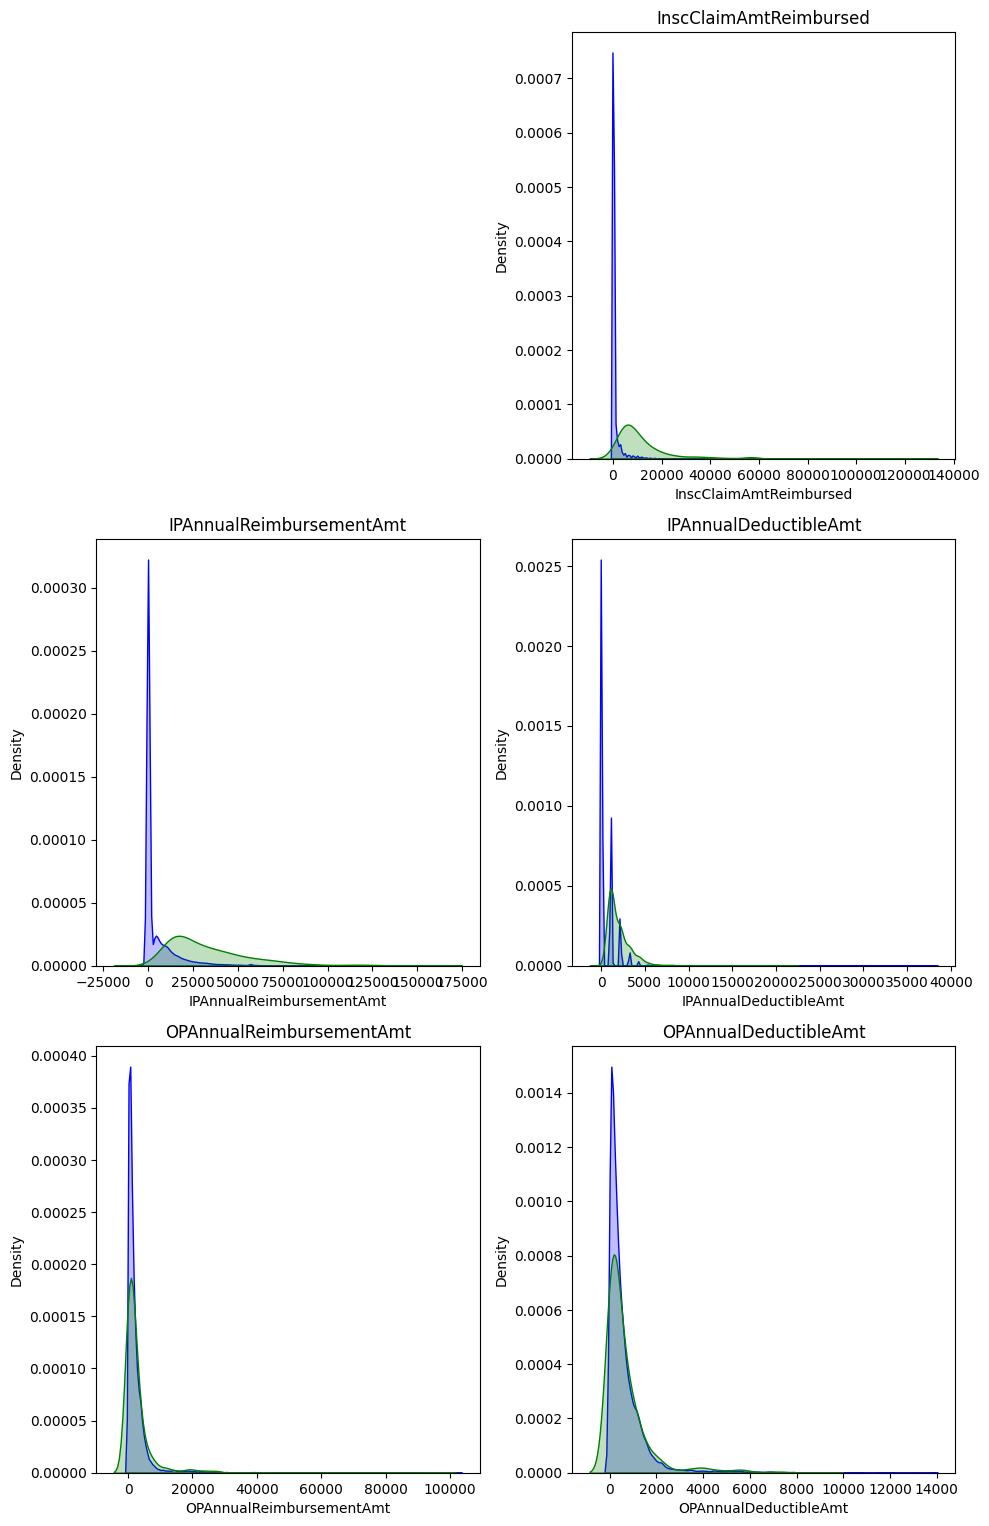

In [27]:
# Select reimbursement/payment columns to compare with DeductibleAmtPaid's distribution
selected_col =  ['DeductibleAmtPaid', 'InscClaimAmtReimbursed', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
            'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']

# Temporarily create a column to replace 'DeductibleAmtPaid' missing values with 0, and present values with 1
patient_train['DeductibleAmtPaid_temp'] = patient_train['DeductibleAmtPaid'].apply(lambda x: 0 if pd.isnull(x) else 1)

num_rows = (len(selected_col) + 3) // 2  # Adjust based on the desired layout
num_cols = 2

plt.figure(figsize=(10, 5*num_rows), layout='tight')
for idx, column in enumerate(selected_col, start=1):
    if column != 'DeductibleAmtPaid':
        plt.subplot(num_rows, num_cols, idx)
        sns.kdeplot(patient_train[patient_train["DeductibleAmtPaid_temp"]==1][column], fill=True, color="blue", label="like")
        sns.kdeplot(patient_train[patient_train["DeductibleAmtPaid_temp"]==0][column], fill=True, color="green", label="dislike")
        plt.title(column)

plt.show()

From the plots above, we observe that missing values for `DeductibleAmtPaid` is associated with a rightwards skew of `InscClaimAmtReimbursed` and `IPAnnualReimbursementAmt`. This could suggest that missing values could be Missing Not At Random (MNAR), where observations who don't pay are those with higher reimbursements. (ie: They ran away with the money with first paying the deductible amount.)

To further confirm this, we will proceed to analyse the distribution between missing vs non missing `DeductibleAmtPaid` against fraudulent transactions.

<Axes: xlabel='DeductibleAmtPaid_temp', ylabel='count'>

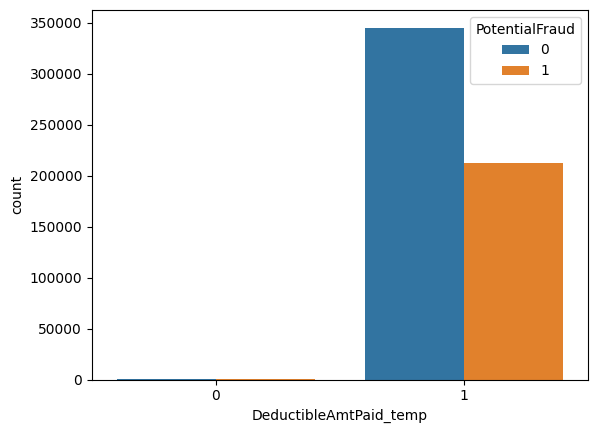

In [28]:
sns.countplot(data=patient_train, x='DeductibleAmtPaid_temp', hue='PotentialFraud')

As the plot above is too small for the missing `DeductibleAmtPaid`, we will plot again and zoom in on the missing values portion.

<Axes: xlabel='DeductibleAmtPaid_temp', ylabel='count'>

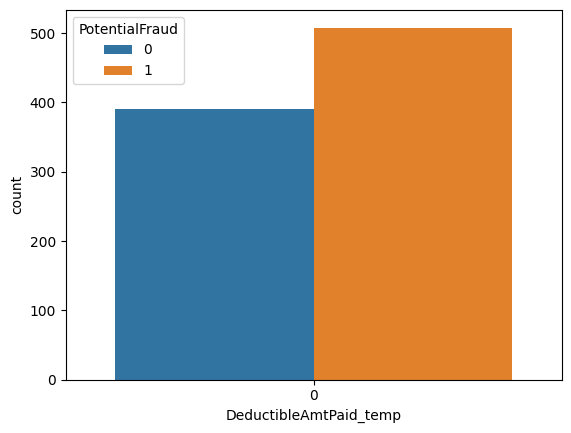

In [29]:
sns.countplot(data=patient_train[patient_train['DeductibleAmtPaid'].isna()], x='DeductibleAmtPaid_temp', hue='PotentialFraud')

We observe that trend for missing values `DeductibleAmtPaid` is the reverse of non-missing values of `DeductibleAmtPaid`. There may be a good chance that people actually ran away.

Hence, fair to impute the missing `DeductibleAmtPaid` values with 0.

In [30]:
# Drop temp columns
patient_train.drop(['DeductibleAmtPaid_temp'], axis=1, inplace=True)

# For DeductibleAmtPaid, assign missing amount to be 0
patient_train['DeductibleAmtPaid'].fillna(0, inplace=True)
patient_test['DeductibleAmtPaid'].fillna(0, inplace=True)

#### Missing Values in Physician Codes
Finally, let us take a look at the missing values in the physician codes.

Similar to what was done for DeductibleAmtPaid, we will observe `AttendingPhysician`'s distribution of missing values in relation reimbursement/payment columns to determine if there are any links to fraud, and determine if it's suitable to impute the missing values with '0'

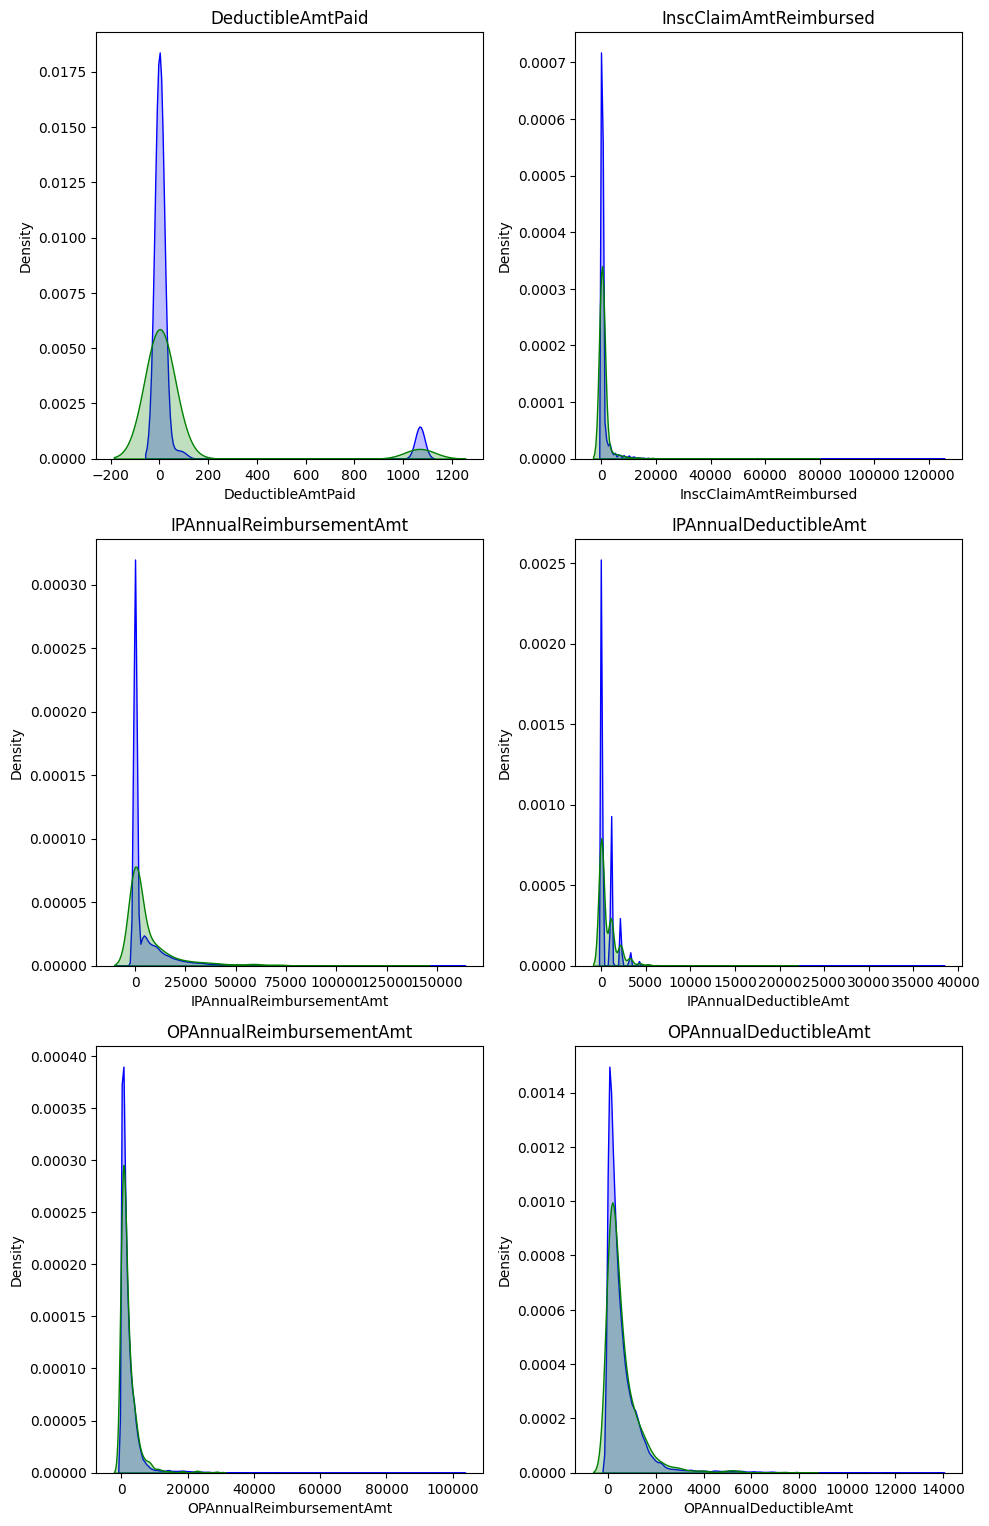

In [31]:
# Temporarily create a column to replace 'AttendingPhysician' missing values with 0, and present values with 1
patient_train['AttendingPhysician_temp'] = patient_train['AttendingPhysician'].apply(lambda x: 0 if pd.isnull(x) else 1)

num_rows = (len(selected_col) + 3) // 2  # Adjust based on the desired layout
num_cols = 2

plt.figure(figsize=(10, 5*num_rows), layout='tight')
for idx, column in enumerate(selected_col, start=1):
    plt.subplot(num_rows, num_cols, idx)
    sns.kdeplot(patient_train[patient_train["AttendingPhysician_temp"]==1][column], fill=True, color="blue", label="like")
    sns.kdeplot(patient_train[patient_train["AttendingPhysician_temp"]==0][column], fill=True, color="green", label="dislike")
    plt.title(column)

plt.show()

From the graphs above, we observe a somewhat similar distribution between `AttendingPhysician` (between missing and present) and the selected numerical columns that could be related to fraud. 

Finally, we check the distribution of missing attending physicians against in/outpatient


In [32]:
patient_train[patient_train['AttendingPhysician_temp']==0].groupby('is_inpatient').count()

# Drop temp column
patient_train.drop(['AttendingPhysician_temp'], axis=1, inplace=True)

Missing attending physicians belong to both in and outpatients, hence not missing at random

Hence `AttendingPhysician` may be Missing Completely At Random (MCAR), and hence can be imputed with 
placeholder "0". We will do this later on when we frequency encode the physician columns.

Moving on, let us analyse the missing values for OperatingPhysician. We start by analysing if these missing rows are associated with outpatient. This is based on a trivial assumption we have that patients who do not stay in the hospital do not require surgery, hence is are Missing at Random.


In [33]:
patient_train[patient_train['OperatingPhysician'].isna()]['is_inpatient'].unique()

array([1, 0], dtype=int64)

Operating Physicians are present for both inpatient and outpatient. 

Maybe Operating Physicians can operate on outpatients too. Hence we will check the distribution of missing vs non missing Operating Physicians on inpatient vs outpatients

<Axes: xlabel='OperatingPhysician_temp', ylabel='count'>

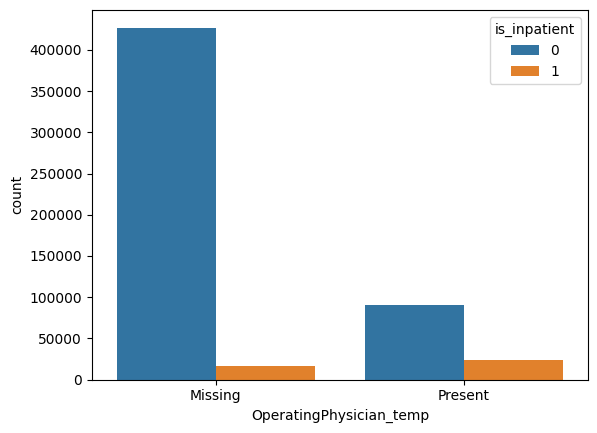

In [34]:
patient_train['OperatingPhysician_temp'] = patient_train['OperatingPhysician'].apply(lambda x: "Missing" if pd.isnull(x) else "Present")
sns.countplot(data=patient_train, x='OperatingPhysician_temp', hue='is_inpatient')

From the above, we can observe that most of the missing operating physicians are for outpatients, with similar trends to non missing observations. Hence, this seems to be Missing At Random, and can be imputed with '0'. We will do this later on when we frequency encode the physician columns.

In [35]:
# drop temp column
patient_train.drop(['OperatingPhysician_temp'], axis=1, inplace=True)

### 2.4 Categorical Encoding <a class="anchor" id="section_2_4"></a>
The following categorical data (Race, Gender, State, County) are already categorically encoded. So we convert them to categorical data type

In [36]:
# Convert the columns to categorical data type
categorical_columns = ['Race', 'Gender', 'State', 'County']

patient_train[categorical_columns] = patient_train[categorical_columns].astype('category')
patient_test[categorical_columns] = patient_test[categorical_columns].astype('category')

### 2.5 Frequency Encoding <a class="anchor" id="section_2_5"></a>
Then we do frequency encoding for all the multi-label categorical features that are not yet encoded. They are the columns containing diagnosis codes, physician codes, procedure codes and diagnosis group codes.
- Note: All NaN values are encoded as '0' based on our justifications above.

In [37]:
# List of codes columns - for physicians, diagnosis and procedure
freq_encoding_cols = {
"Physician Codes" : ['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician'],

"Diagnosis Codes" : ['ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 
                   'ClmDiagnosisCode_4','ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 
                   'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9','ClmDiagnosisCode_10'],

"Procedure Codes" : ['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 
                   'ClmProcedureCode_5'],

"Diagnosis Group Codes" : ['DiagnosisGroupCode']
}

In [38]:
# CountEncode each code group columns (Both Train and Test)
for k, code_cols in freq_encoding_cols.items():
    ec = ce.CountEncoder()
    # fit Encoder on stacked train data of each code group
    ec = ec.fit(patient_train[code_cols].stack(dropna=True).astype('O'))
    # transform each column of the code group
    for col in code_cols:
        patient_train[col + "_ce"] = ec.transform(patient_train[col].rename(0))
        patient_train[col + "_ce"] = patient_train[col + "_ce"].astype('category')
        patient_test[col + "_ce"] = ec.transform(patient_test[col].rename(0))
        patient_test[col + "_ce"] = patient_test[col + "_ce"].astype('category')
    print(f"Complete encoding for {k}")

Complete encoding for Physician Codes
Complete encoding for Diagnosis Codes
Complete encoding for Procedure Codes
Complete encoding for Diagnosis Group Codes


### 2.6 Vector Embedding of Diagnosis Codes <a class="anchor" id="section_2_6"></a>
# **Insert Theja's Embedding work here.**

## 3. Exploratory Data Analysis <a class="anchor" id="chapter3"></a>
Now that our data is processed, we will proceed to explore the `PotentialFraud` proportion in different Features belonging to our training data.

### 3.1 Correlation Plot <a class="anchor" id="section_3_1"></a>
We start by first plotting the correlation matrix between all our numerical columns.

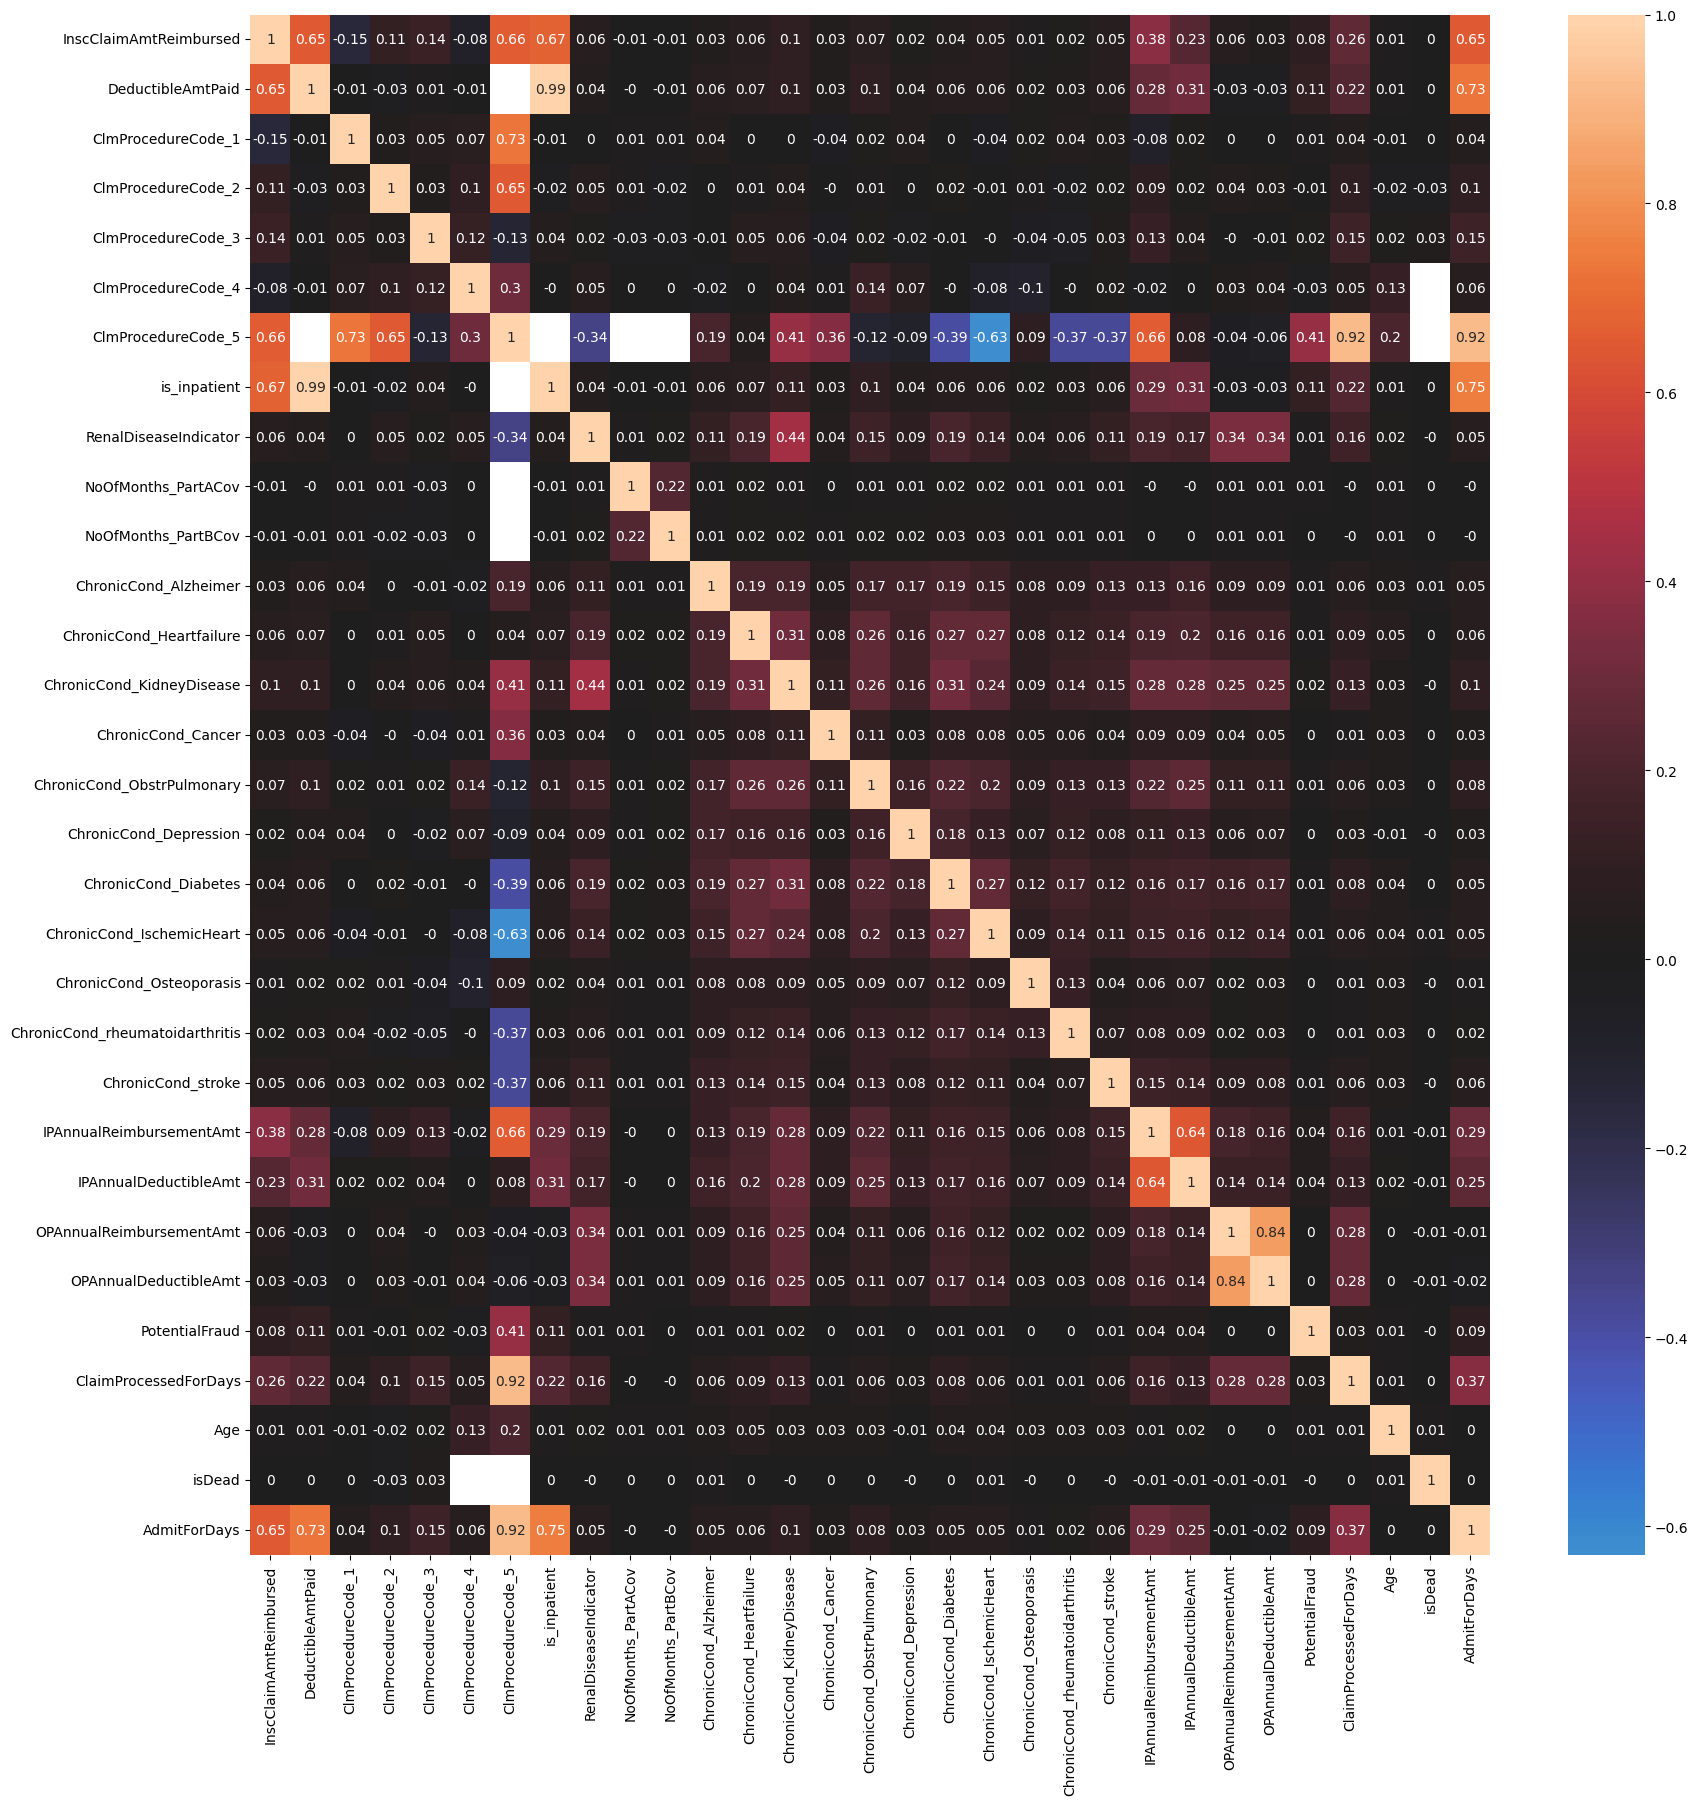

In [39]:
# Compute the correlation matrix for numerical columns
num_col = patient_train.select_dtypes(include=['number'])
corrmat =  num_col.corr()

# Set the size of the heatmap figure
plt.figure(figsize=(20, 20))

# Round the correlation values to 2 decimal places
rounded_corrmat = corrmat.round(2)

# Create a heatmap of the rounded correlation matrix
sns.heatmap(rounded_corrmat, annot=True, center=0)

# Display the heatmap
plt.show()

### 3.2 Overall Fraud Proportion <a class="anchor" id="section_3_2"> </a>
Next we take a look at the proportion of fraudulent to non-fraudulent claims.

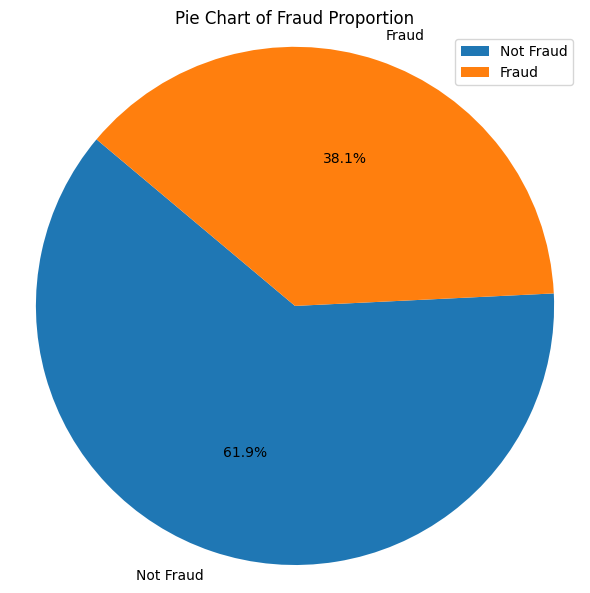

In [40]:
fraud_counts = patient_train['PotentialFraud'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6), layout='tight')
plt.pie(fraud_counts, labels=['Not Fraud', 'Fraud'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.title('Pie Chart of Fraud Proportion')
plt.legend()
plt.show()

Based on the pie chart, there is a mild imbalance in the percentage of fraud to non-fraud claims at about 60% to 40%.

### 3.3 Proportion by Categorical Features <a class="anchor" id="section_3_3"></a>
Next we examine the fraud distribution of claims across some of our categorical features.

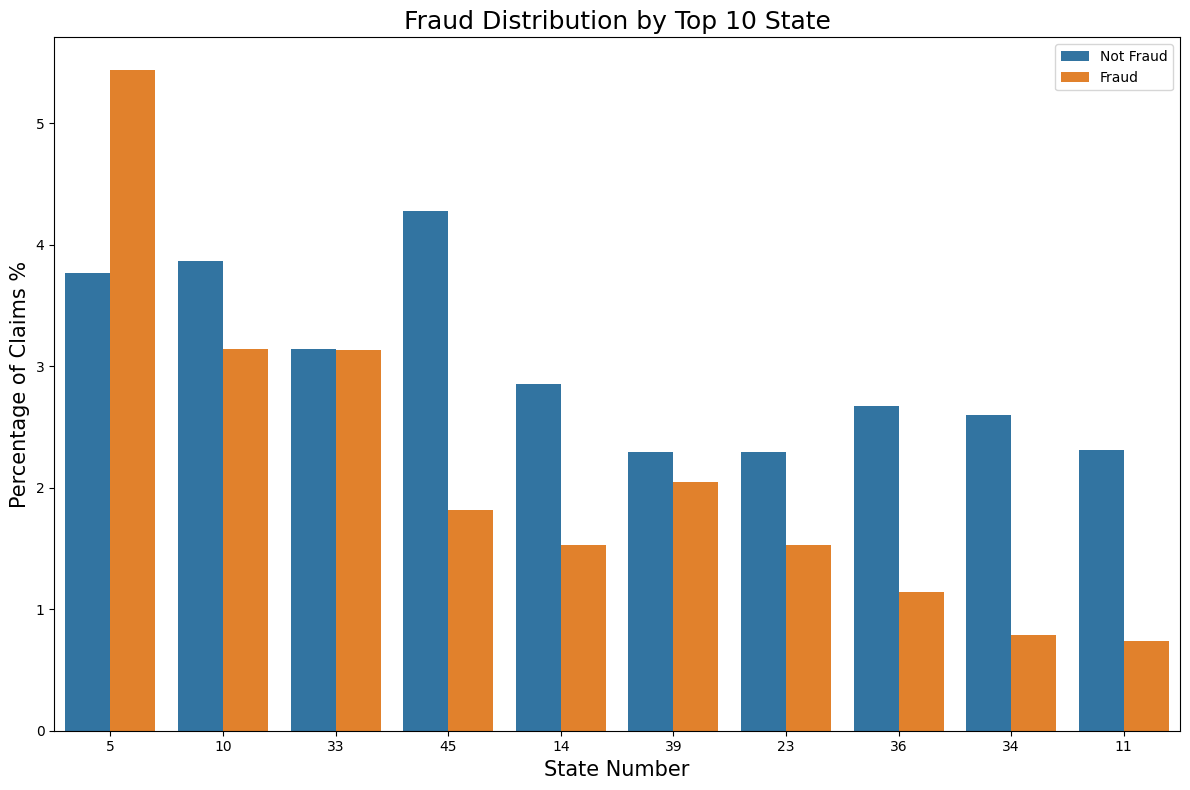

In [41]:
# We will first analyse the distribution of Frauds across the top 10 States with most claims
plt.figure(figsize=(12, 8), layout='tight')
sns.countplot(x='State',hue='PotentialFraud',data=patient_train, stat='percent'
              ,order=patient_train['State'].value_counts().iloc[:10].index)

plt.title("Fraud Distribution by Top 10 State",fontsize=18)
plt.xlabel("State Number",fontsize=15)
plt.ylabel("Percentage of Claims %",fontsize=15)
plt.legend(labels=['Not Fraud', 'Fraud'])
plt.show()

With the exception of State 5 which has the most number of claims, all other states appear to have a higher or equal proportion of fraudulent to non-fraudulent claims.

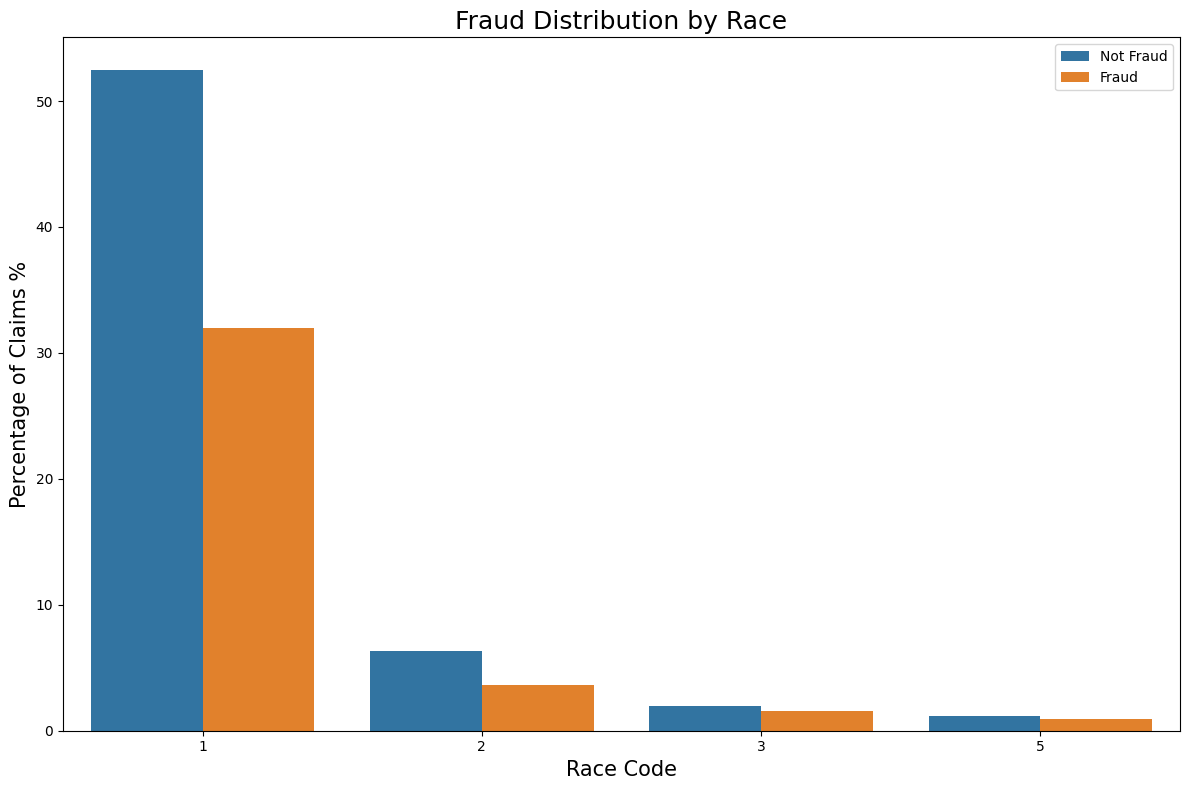

In [42]:
# Next we analyse the distribution of fraud by race.
plt.figure(figsize=(12, 8), layout='tight')

sns.countplot(x='Race',hue='PotentialFraud',data=patient_train, stat='percent'
              ,order=patient_train['Race'].value_counts().iloc[:10].index)

plt.title("Fraud Distribution by Race",fontsize=18)
plt.xlabel("Race Code",fontsize=15)
plt.ylabel("Percentage of Claims %",fontsize=15)
plt.legend(labels=['Not Fraud', 'Fraud'])
plt.show()


It can be observed that Race 1 contributes to the largest proportion of claims. We can also observe that there is no claims made by Race 4. Finally, all the distributions are relatively similar across the different races, with the difference in proportion of fraud to non-fraud decreasing from race 1 to race 5.

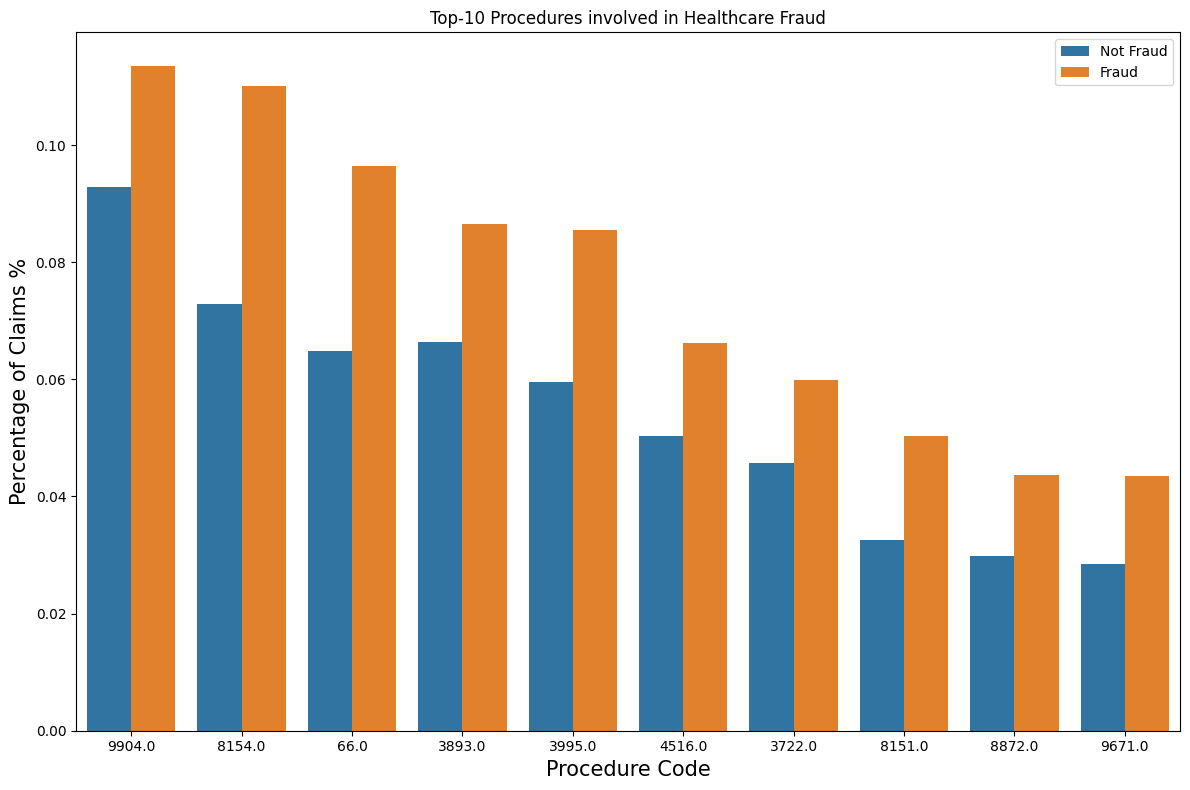

In [43]:
# Then we look at the distribution of Fraud across top 10 Procedures
# Note: As mentioned above, since procedure codes are likely to be filled in numerical order,
# as such we can use ClmProcedureCode_1 to analyse the top 10 procedures, since this column
# is likely to contain the bulk of procedure codes used.

plt.figure(figsize=(12, 8), layout='tight')
ax=sns.countplot(x='ClmProcedureCode_1',hue='PotentialFraud',data=patient_train, stat='percent'
              ,order=patient_train.ClmProcedureCode_1.value_counts().iloc[:10].index)

plt.title('Top-10 Procedures involved in Healthcare Fraud')
plt.xlabel("Procedure Code",fontsize=15)
plt.ylabel("Percentage of Claims %",fontsize=15)
plt.legend(labels=['Not Fraud', 'Fraud'])
    
plt.show()


Based on the finding above, it is interesting to observe that all top 10 codes have a larger proportion of fraudulent claims to non-fraudulent claims. This is likely due to the fact that fraudsters may want to blend in and file fraudulent claims for common procedures to avoid detection.

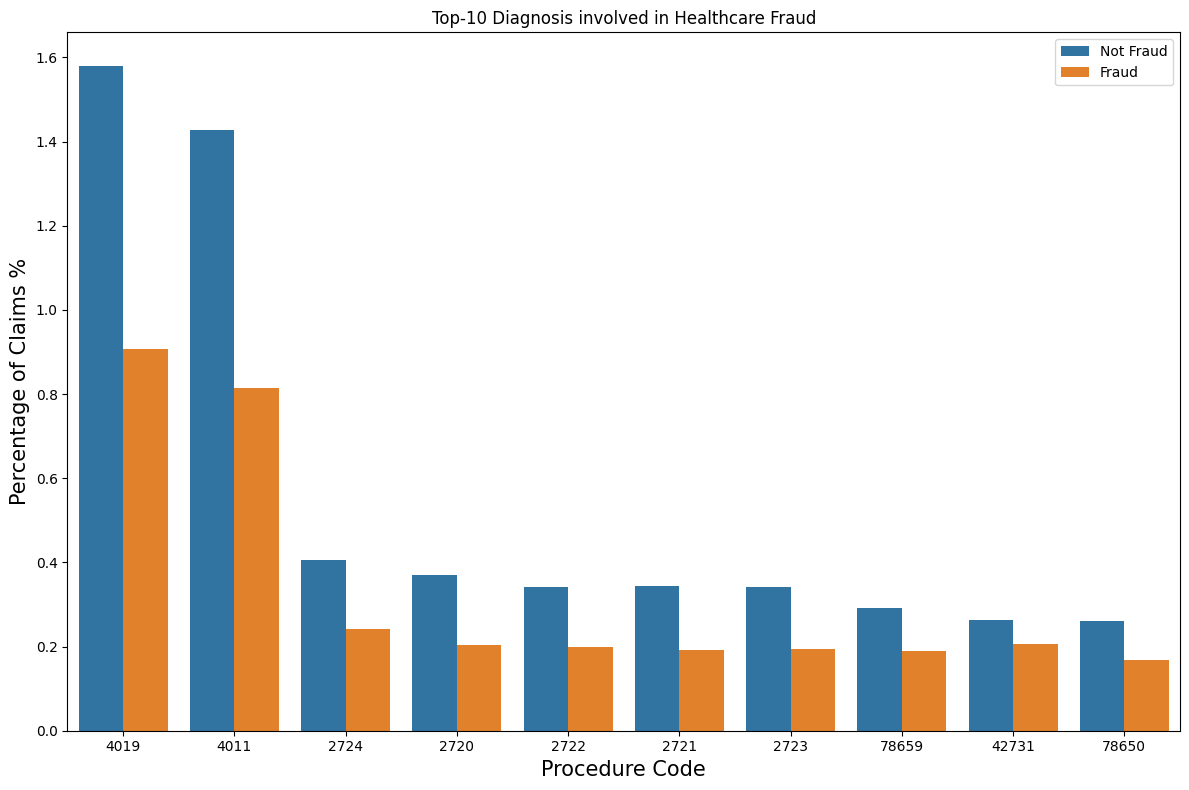

In [44]:
# Then we look at the distribution of Fraud across top 10 Diagnosis

plt.figure(figsize=(12, 8), layout='tight')
ax=sns.countplot(x='ClmDiagnosisCode_1',hue='PotentialFraud',data=patient_train, stat='percent'
              ,order=patient_train.ClmDiagnosisCode_1.value_counts().iloc[:10].index)

plt.title('Top-10 Diagnosis involved in Healthcare Fraud')
plt.xlabel("Procedure Code",fontsize=15)
plt.ylabel("Percentage of Claims %",fontsize=15)
plt.legend(labels=['Not Fraud', 'Fraud'])
    
plt.show()

All the top 10 diagnosis codes share similar distribution of fraud to non-fraud claims. The diagnosis code with the largest percentage of claims is 4019.

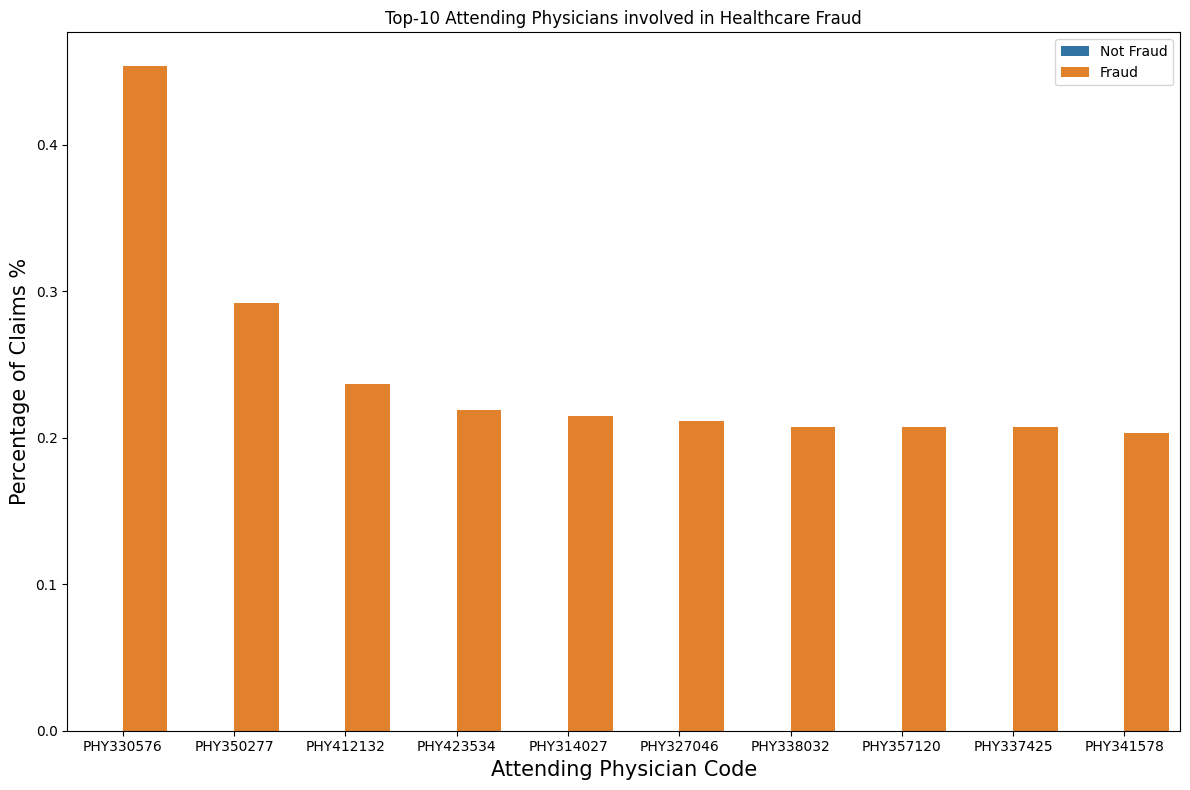

In [45]:
# Finally, we look at the distribution of Fraud across Attending Physicians

plt.figure(figsize=(12, 8), layout='tight')
ax=sns.countplot(x='AttendingPhysician',hue='PotentialFraud',data=patient_train, stat='percent'
              ,order=patient_train.AttendingPhysician.value_counts().iloc[:10].index)

plt.title('Top-10 Attending Physicians involved in Healthcare Fraud')
plt.xlabel("Attending Physician Code",fontsize=15)
plt.ylabel("Percentage of Claims %",fontsize=15)
plt.legend(labels=['Not Fraud', 'Fraud'])
    
plt.show()

It is interesting to observe from above that the top 10 attending physicians with the most claims are fraudsters.

## 4. Data Uploading <a class="anchor" id="chapter4"></a>
Now that we have completed our EDA and basic feature engineering, we will save all this data into a new csv file.

### 4.1 Obtain Relevant Columns <a class="anchor" id="section_4_1"></a>
- Keep newly engineered features, categorical features, encoded features and scaled numerical features
- Ignore date columns, diagnosis, procedure and physician codes columns
- Upload to X_train, y_train and X_test csv file

In [46]:
relevant_cols = ['BeneID', 'ClaimID', 'Provider',
       'InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'is_inpatient', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age', 'isDead',
       'AdmitForDays', 'ClaimProcessedForDays', 'AttendingPhysician_ce',
       'OperatingPhysician_ce', 'OtherPhysician_ce',
       'ClmAdmitDiagnosisCode_ce', 'ClmDiagnosisCode_1_ce',
       'ClmDiagnosisCode_2_ce', 'ClmDiagnosisCode_3_ce',
       'ClmDiagnosisCode_4_ce', 'ClmDiagnosisCode_5_ce',
       'ClmDiagnosisCode_6_ce', 'ClmDiagnosisCode_7_ce',
       'ClmDiagnosisCode_8_ce', 'ClmDiagnosisCode_9_ce',
       'ClmDiagnosisCode_10_ce', 'ClmProcedureCode_1_ce',
       'ClmProcedureCode_2_ce', 'ClmProcedureCode_3_ce',
       'ClmProcedureCode_4_ce', 'ClmProcedureCode_5_ce', 'DiagnosisGroupCode_ce']
target_col = ['BeneID', 'Provider', 'PotentialFraud']

In [47]:
# X_train, y_train, and X_test
X_train = patient_train[relevant_cols]
y_train = patient_train[target_col]
X_test = patient_test[relevant_cols]

num_rows = X_train.shape[0]
split_index = num_rows // 2

# Split the DataFrame into two equal parts
X_train1 = X_train.iloc[:split_index]
X_train2 = X_train.iloc[split_index:]

# Save X_train, y_train, and X_test to csv files
X_train1.to_csv('X_train1.csv', index=False)
X_train2.to_csv('X_train2.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)